# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

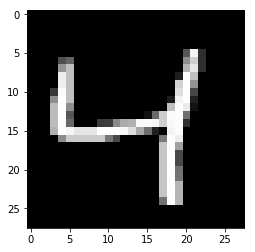

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value
input_size = 784

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, input_size])
targets_ = tf.placeholder(tf.float32, [None, input_size])

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, input_size)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6946
Epoch: 1/20... Training loss: 0.6904
Epoch: 1/20... Training loss: 0.6865
Epoch: 1/20... Training loss: 0.6821
Epoch: 1/20... Training loss: 0.6772
Epoch: 1/20... Training loss: 0.6717
Epoch: 1/20... Training loss: 0.6651
Epoch: 1/20... Training loss: 0.6568
Epoch: 1/20... Training loss: 0.6490
Epoch: 1/20... Training loss: 0.6377
Epoch: 1/20... Training loss: 0.6259
Epoch: 1/20... Training loss: 0.6115
Epoch: 1/20... Training loss: 0.5991
Epoch: 1/20... Training loss: 0.5853
Epoch: 1/20... Training loss: 0.5694
Epoch: 1/20... Training loss: 0.5511
Epoch: 1/20... Training loss: 0.5363
Epoch: 1/20... Training loss: 0.5135
Epoch: 1/20... Training loss: 0.4966
Epoch: 1/20... Training loss: 0.4798
Epoch: 1/20... Training loss: 0.4597
Epoch: 1/20... Training loss: 0.4465
Epoch: 1/20... Training loss: 0.4290
Epoch: 1/20... Training loss: 0.4170
Epoch: 1/20... Training loss: 0.3968
Epoch: 1/20... Training loss: 0.3863
Epoch: 1/20... Training loss: 0.3736
E

Epoch: 1/20... Training loss: 0.1917
Epoch: 1/20... Training loss: 0.1826
Epoch: 1/20... Training loss: 0.1915
Epoch: 1/20... Training loss: 0.1822
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1855
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1848
Epoch: 1/20... Training loss: 0.1818
Epoch: 1/20... Training loss: 0.1847
Epoch: 1/20... Training loss: 0.1787
Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1788
Epoch: 1/20... Training loss: 0.1811
Epoch: 1/20... Training loss: 0.1786
Epoch: 1/20... Training loss: 0.1850
Epoch: 1/20... Training loss: 0.1830
Epoch: 1/20... Training loss: 0.1857
Epoch: 1/20... Training loss: 0.1796
Epoch: 1/20... Training loss: 0.1778
Epoch: 1/20... Training loss: 0.1843
Epoch: 1/20... Training loss: 0.1745
Epoch: 1/20... Training loss: 0.1743
Epoch: 1/20... Training loss: 0.1826
Epoch: 1/20... Training loss: 0.1861
Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1809
E

Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1470
Epoch: 2/20... Training loss: 0.1526
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1486
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1509
Epoch: 2/20... Training loss: 0.1481
Epoch: 2/20... Training loss: 0.1514
Epoch: 2/20... Training loss: 0.1523
Epoch: 2/20... Training loss: 0.1482
Epoch: 2/20... Training loss: 0.1512
Epoch: 2/20... Training loss: 0.1456
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1452
Epoch: 2/20... Training loss: 0.1485
Epoch: 2/20... Training loss: 0.1499
Epoch: 2/20... Training loss: 0.1493
Epoch: 2/20... Training loss: 0.1422
Epoch: 2/20... Training loss: 0.1491
Epoch: 2/20... Training loss: 0.1509
Epoch: 2/20... Training loss: 0.1507
Epoch: 2/20... Training loss: 0.1474
Epoch: 2/20... Training loss: 0.1477
Epoch: 2/20... Training loss: 0.1544
E

Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1276
Epoch: 3/20... Training loss: 0.1282
Epoch: 3/20... Training loss: 0.1331
Epoch: 3/20... Training loss: 0.1292
Epoch: 3/20... Training loss: 0.1303
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1263
Epoch: 3/20... Training loss: 0.1247
Epoch: 3/20... Training loss: 0.1298
Epoch: 3/20... Training loss: 0.1331
Epoch: 3/20... Training loss: 0.1320
Epoch: 3/20... Training loss: 0.1284
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1319
Epoch: 3/20... Training loss: 0.1314
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1297
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1288
Epoch: 3/20... Training loss: 0.1286
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1290
Epoch: 3/20... Training loss: 0.1283
Epoch: 3/20... Training loss: 0.1251
E

Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1125
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1174
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1115
Epoch: 4/20... Training loss: 0.1147
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1127
E

Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1044
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1105
E

Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1088
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.0992
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1000
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1002
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1090
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1001
E

Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.0964
E

Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0925
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0950
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0948
E

Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0907
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0920
Epoch: 9/20... Training loss: 0.1004
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0927
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0965
E

Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0906
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0923
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.1002
Epoch: 11/20... Training loss: 0.0984
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0905
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0911
Epoch: 11/20... Training loss: 0.0994
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0904
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0902
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0891
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0899
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0973
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0980
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0886
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0897
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0896
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0895
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0895
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0897
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0999
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0879
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0891
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0900
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0971
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0899
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0984
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0976
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0896
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0888
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0893
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0974
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

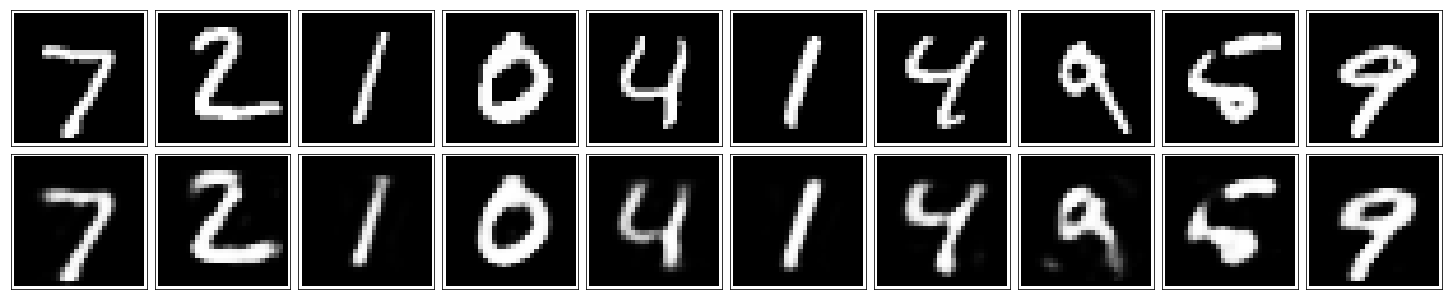

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.